# **Phone Number Tracking program with Python**



---

This is a simple python project just for fun, that provides some basic stuff about any phone number (along with country code) user enters. The stuff is supposed to be:

*   Location (in a map-html file)
*  Service Provider name for that sim card

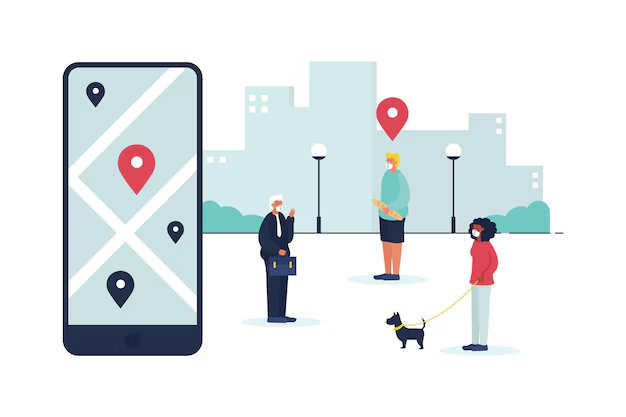

For this, install the following packages first, [phonenumbers](https://pypi.org/project/phonenumbers/) (for parsing, formatting, storing and validating phone numbers), [folium](https://pypi.org/project/folium/) (visualizing data in a leaflet map) and [opencage](https://pypi.org/project/opencage/) (python module for opencage geocoding API).

In [18]:
!pip install phonenumbers
!pip install folium
!pip install opencage
#--packages--

In [19]:
#access libs and mods
import phonenumbers
from phonenumbers import geocoder
from phonenumbers import carrier
import folium
from opencage.geocoder import OpenCageGeocode

I used API key from [OpenCage](https://opencagedata.com/) and used the secrets manager in Google Colab to store it privately.

In [20]:
#for ApiKey in Secret Manager(Google colab)
from google.colab import userdata

Starting with user input, the string is further parsed using `parse()` function to create a phone number object.

In [22]:
number = input("Phone Number along with Country Code: ")

#parse for formatting
phoneNumber = phonenumbers.parse(number)

#access API key from secret manager - API key used from Open Cage
Key = userdata.get('apiKey')

Phone Number along with Country Code: +919540161344


Now, the main part of the program is all about accessing and retrieving stuff. This retrieval is all about `phone_geocoder` library and `opencage_geocoder` to get the location as well as their concerned geographical coordinates.

In [23]:
#location
yourLocation = phone_geocoder.description_for_number(phoneNumber, "en")
print("location : " + yourLocation)

#service provider
yourServiceProvider = carrier.name_for_number(phoneNumber, "en")
print("service provider : " + yourServiceProvider)

#lat and long for map
opencage_geocoder = OpenCageGeocode(Key)
query = str(yourLocation)
results = opencage_geocoder.geocode(query)

#assign vals acc
lat = results[0]['geometry']['lat']
lng = results[0]['geometry']['lng']

location : India
service provider : Idea


Finally those coordinates' values are used to visualize the location on the map along with a marker to pin point the location. And the final map image is stored as a HTML file.

In [24]:
#fetch map
myMap = folium.Map(location=[lat, lng], zoom_start=9)

#put marker to pin point location
folium.Marker([lat, lng], popup=yourLocation, icon=folium.Icon(color='purple', icon_color='white', icon='circle')).add_to(myMap)

#save
myMap.save("Location.html")

To access the HTML file generated as result in Google Colab, follow the steps:


*   Go to files tab on the left hand side of the window. (The one outlined with blue circle).

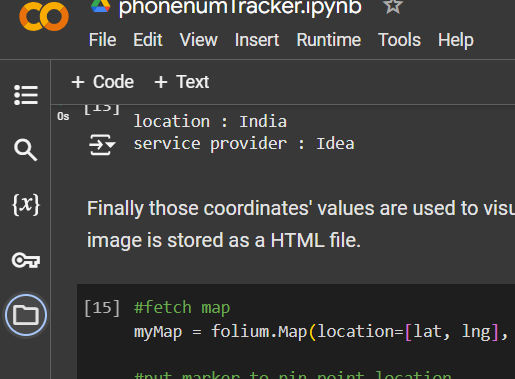


*   Now download the file named Location.html and you can see the map.


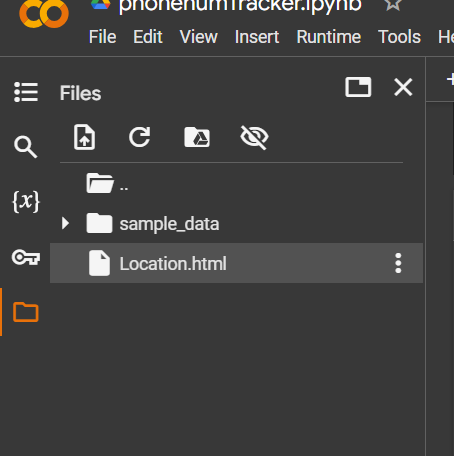



Sample Map image from location.html file.

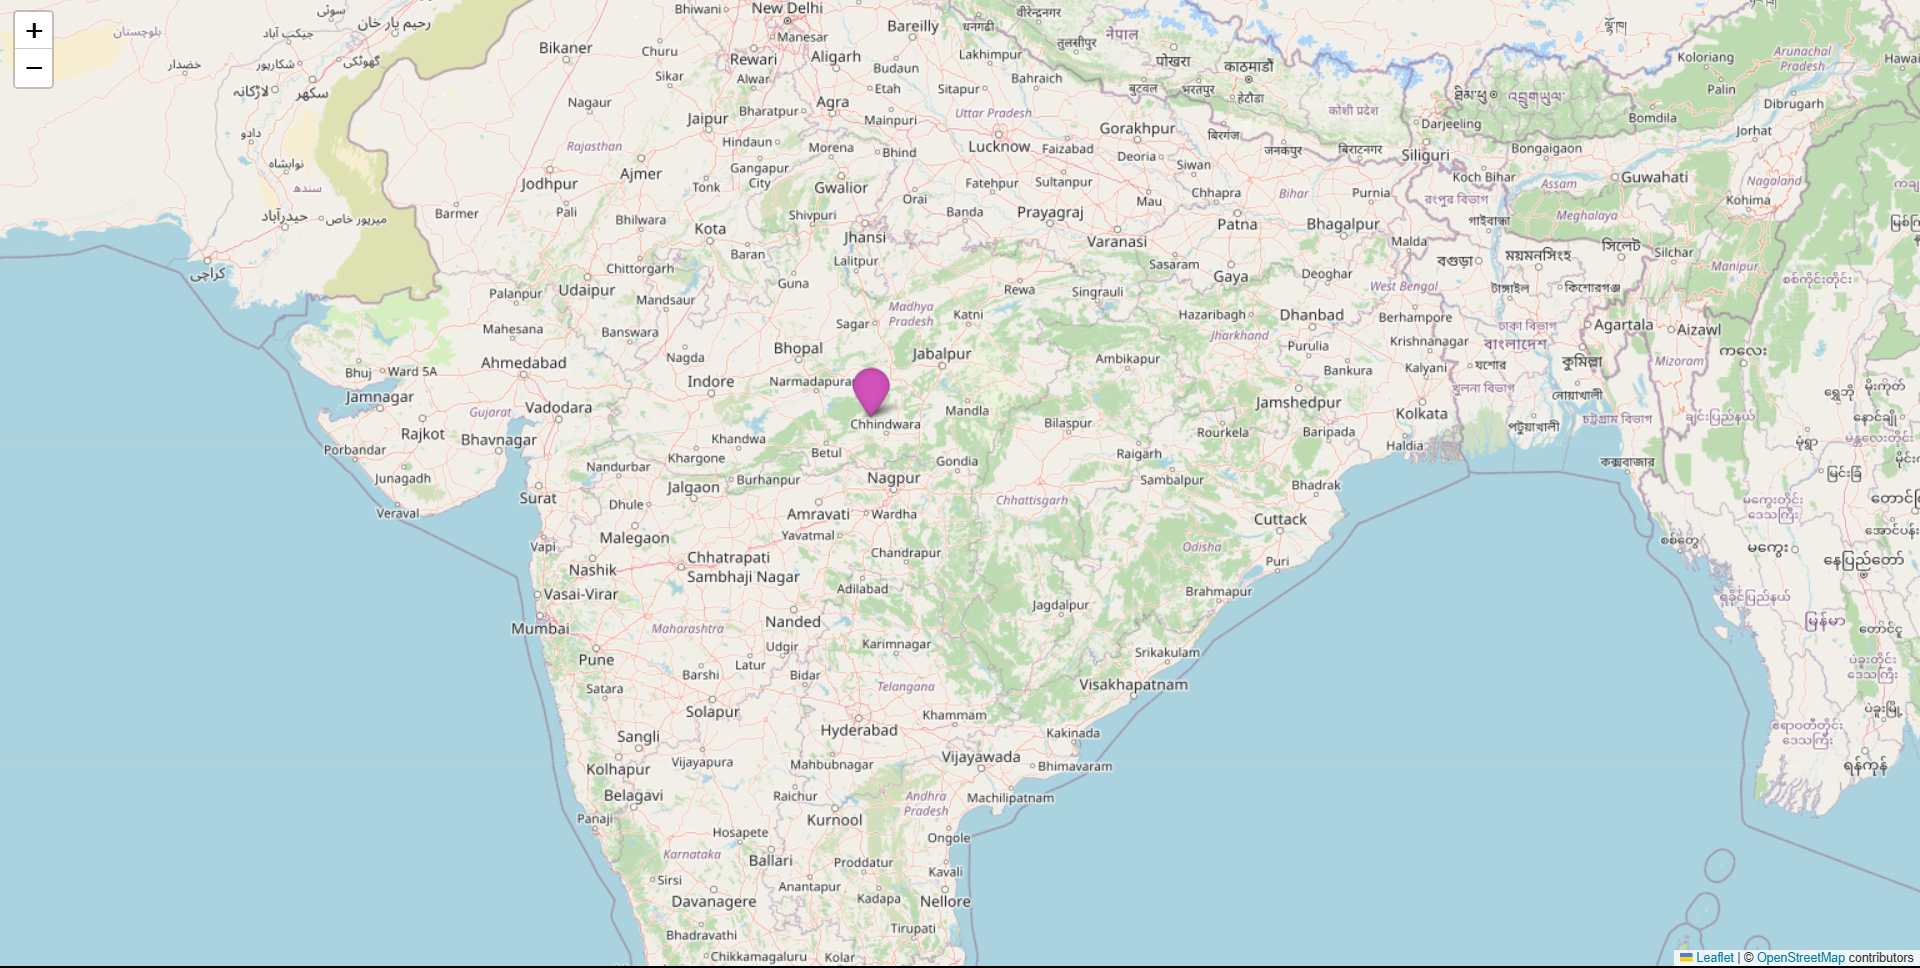

*Image used at the beginning from [FreePik](https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.freepik.com%2Ffree-photos-vectors%2Fmobile-tracking&psig=AOvVaw1AGND5NyL2OI7R5ilvv2pq&ust=1730874690902000&source=images&cd=vfe&opi=89978449&ved=0CBcQjhxqFwoTCLjgn_DIxIkDFQAAAAAdAAAAABAE)*